In [1]:
###: Importing H2O Library

In [2]:
import h2o

In [3]:
###: Initializing h2O

In [4]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,4 hours 14 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,3.028 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [5]:
### : Getting H2O Cluster status

In [6]:
h2o.cluster().show_status()

H2O cluster uptime:,4 hours 14 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,3.028 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing Dataset

In [8]:
df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/house_price_train.csv")
test = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/house_price_test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
###: Understanding Dataset

In [10]:
df.describe()

Rows:407
Cols:14




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00906,0.0,0.46,0.0,0.385,3.863,2.9,1.1296,1.0,188.0,12.6,0.32,1.73,5.0
mean,3.56736771499,10.5872235872,11.4092628993,0.0687960687961,0.556763882064,6.28658230958,69.3889434889,3.71767051597,9.83783783784,412.378378378,18.4474201474,354.403218673,12.792039312,22.6248157248
maxs,73.5341,100.0,27.74,1.0,0.871,8.725,100.0,10.7103,24.0,711.0,22.0,396.9,37.97,50.0
sigma,7.94798961655,22.2597824603,6.8144822924,0.253418548596,0.115557348898,0.690897322921,27.8179045475,2.01524090631,8.78440418525,170.44740987,2.16176742548,94.175205015,7.09869539936,9.18501930903
zeros,0,301,0,379,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [11]:
###: Understanding Dataset with pylab library

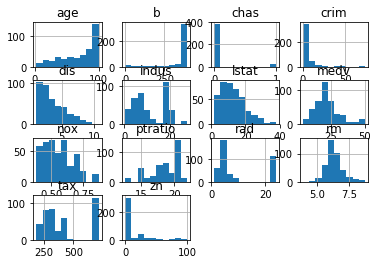

In [12]:
import pylab as pl
pl.figure(figsize=(20,10))
df.as_data_frame().hist()
pl.show()

In [13]:
###: Getting a list of columns in our dataset

In [14]:
df.col_names

[u'crim',
 u'zn',
 u'indus',
 u'chas',
 u'nox',
 u'rm',
 u'age',
 u'dis',
 u'rad',
 u'tax',
 u'ptratio',
 u'b',
 u'lstat',
 u'medv']

In [15]:
###: Setting Response column

In [16]:
response = "medv"

In [17]:
###: spliting the dataset into train and validation  

In [18]:
train, valid = df.split_frame(ratios=[0.9])
print(train.shape)
print(valid.shape)

(371, 14)
(36, 14)


In [19]:
###: Setting all columns/features into a local variable

In [20]:
features = df.col_names

In [21]:
###: Settings all features for model building

In [22]:
features.remove(response)
print(features)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat']


In [23]:
###: Importing H2O AutoML Library

In [24]:
from h2o.automl import H2OAutoML

In [25]:
###: Setting H2O AutoML model configuration (default)

In [26]:
house_price_automl = H2OAutoML(max_models= 100,
                           seed=1234,
                           max_runtime_secs=60, 
                           project_name= "House Price AutoML")

In [27]:
###: Training H2O AutoML 

In [28]:
house_price_automl.train(x = features, y = response,training_frame=train,validation_frame=valid)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [29]:
###: Getting the list of models created by AutoML in given time

In [30]:
house_price_automl.leaderboard

model_id,mean_residual_deviance,rmse,mae,rmsle
GBM_grid_1_AutoML_20171120_220231_model_39,0.127056,0.35645,0.265886,0.016751
GBM_grid_1_AutoML_20171120_220231_model_21,0.309363,0.556204,0.368297,0.028477
GBM_grid_1_AutoML_20171120_220231_model_44,0.598862,0.773862,0.330385,0.020201
GBM_grid_1_AutoML_20171120_220231_model_11,0.63275,0.795456,0.422251,0.03059
GBM_grid_1_AutoML_20171120_220231_model_27,0.638285,0.798928,0.43364,0.025189
GBM_grid_0_AutoML_20171120_220231_model_0,0.656316,0.810133,0.5497,0.032043
GBM_grid_1_AutoML_20171120_220231_model_12,0.946153,0.972704,0.220427,0.022959
GBM_grid_1_AutoML_20171120_220231_model_45,0.972547,0.986178,0.620148,0.053685
GBM_grid_1_AutoML_20171120_220231_model_4,1.04197,1.02077,0.62207,0.041485
GBM_grid_1_AutoML_20171120_220231_model_3,1.40575,1.18564,0.325409,0.03488


In [31]:
###: Getting the best model or Leader model from the AutoML leader board

In [32]:
house_price_leader = house_price_automl.leader

In [33]:
###: Understanding best Model (Leader Model) overall performance based on training data

In [34]:
house_price_leader.model_performance(valid=True)


ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 3.15474650097
RMSE: 1.77616060675
MAE: 1.24433897232
RMSLE: 0.0847097017357
Mean Residual Deviance: 3.15474650097


In [35]:
house_price_leader.model_performance(valid=True).r2()

0.9629223985884828

In [36]:
###: Plotting AutoML Leader Model for its AUC metric 

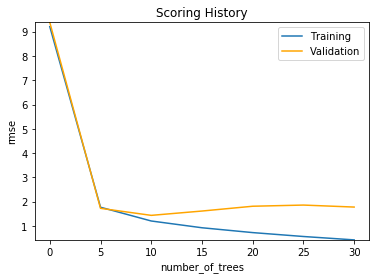

In [37]:
house_price_leader.plot(metric='AUTO')

In [38]:
###: Generating Variable Importance Plot for the Leader Model

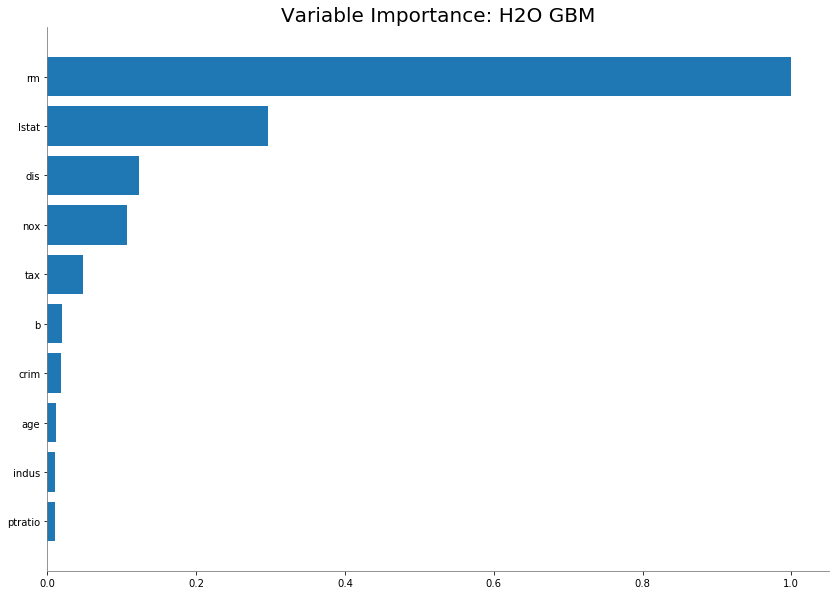

In [39]:
house_price_leader.varimp_plot()

In [40]:
###:  H2O AutoMLmodel varialbe Scoring History

In [41]:
house_price_leader.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2017-11-20 22:03:18,38.496 sec,0.0,9.208773,6.706875,84.801505,9.382516,7.701822,88.031599
1,,2017-11-20 22:03:18,38.501 sec,5.0,1.769434,1.390692,3.130898,1.723823,1.369386,2.971567
2,,2017-11-20 22:03:18,38.506 sec,10.0,1.202395,0.943291,1.445753,1.434421,1.133789,2.057563
3,,2017-11-20 22:03:18,38.512 sec,15.0,0.923615,0.725091,0.853064,1.612505,1.163890,2.600173
4,,2017-11-20 22:03:18,38.517 sec,20.0,0.724188,0.565273,0.524448,1.810227,1.203006,3.276920
5,,2017-11-20 22:03:18,38.522 sec,25.0,0.563412,0.423820,0.317433,1.858359,1.317625,3.453500
6,,2017-11-20 22:03:18,38.527 sec,30.0,0.423600,0.319575,0.179437,1.776161,1.244339,3.154747


In [42]:
### PERFORMING PREDICTIONS USING a TEST DATA SET with Auto ML Leader model

In [43]:
house_price_leader.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
18.4417
24.2319
16.7656
13.4714
13.4934
14.5549
21.073
21.0795
31.0548
19.5029


In [44]:
###: Getting AUC metrics from the test data using AutoML Leader Model

In [45]:
house_price_leader.model_performance(test_data=test).r2()

0.6644497982450016